<a href="https://colab.research.google.com/github/PeaceLearner01/Diabetes_Prediction_Using_ML/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler


### Dataset:
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.


In [57]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
# diabetes = df["diabetes"]
# print((diabetes == 1).sum())
# print((df['diabetes'] == 0).sum())
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [58]:
df["gender"] = (df["gender"] == "Male").astype(int)

In [59]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


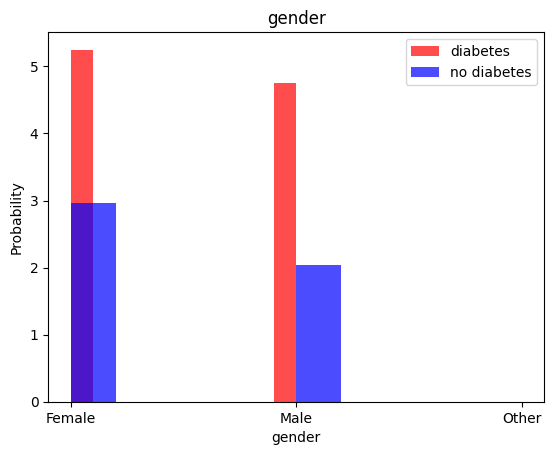

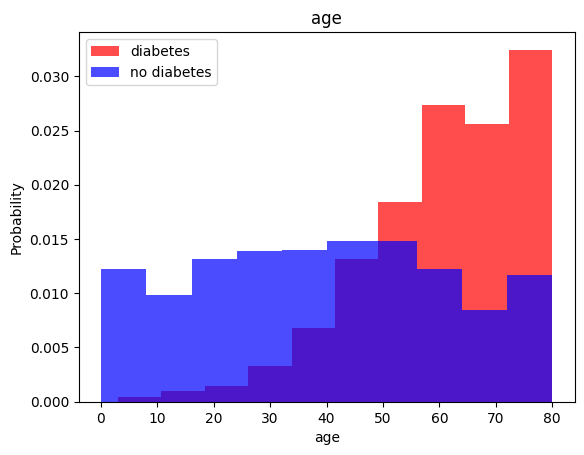

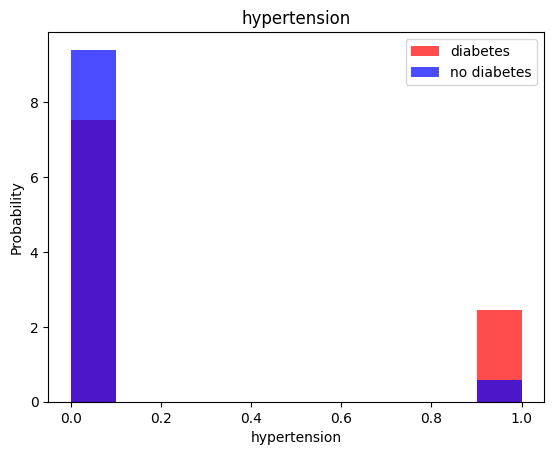

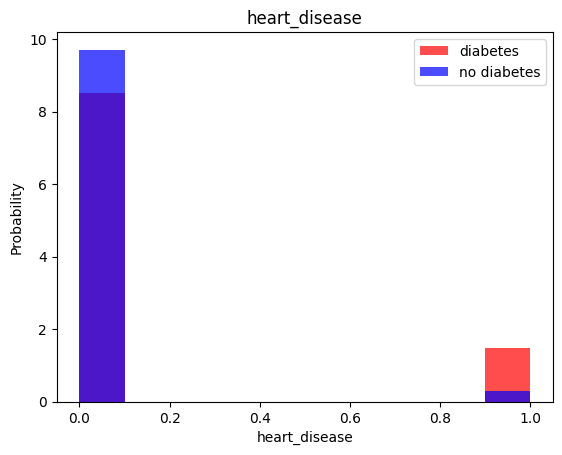

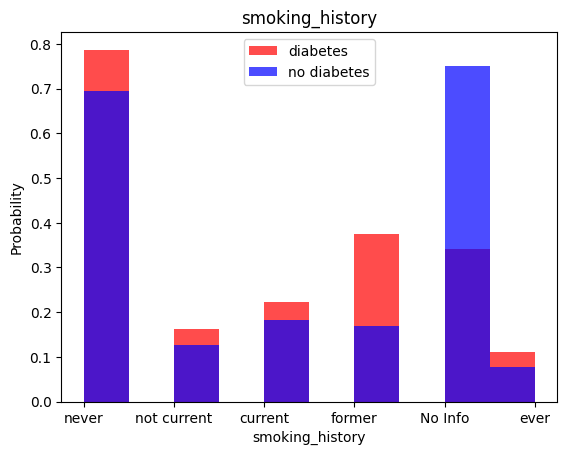

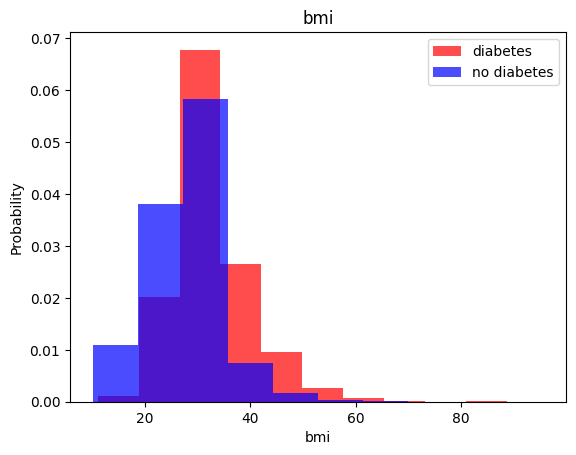

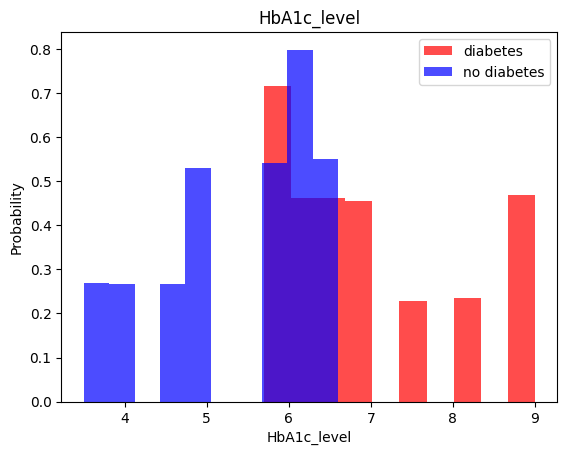

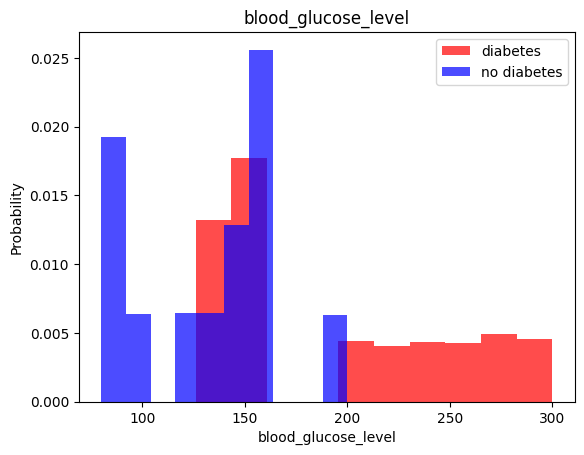

In [24]:
for label in df.columns[:-1]:
    # print(f"{label}: {df[label].unique()}")
    plt.hist(df[df['diabetes'] == 1][label], color='red', label='diabetes', alpha=0.7, density=True)
    plt.hist(df[df['diabetes'] == 0][label], color='blue', label='no diabetes', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

#Train, Valid, Test datasets


In [60]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [55]:
def scale_dataset(dataframe,oversample=False):
    # x = dataframe[dataframe.columns[:-1]].values
    # y = dataframe[dataframe.columns[-1]].values

    # scaler = StandardScaler()
    # x = scaler.fit_transform(x)

    # if oversample:
    #     ros = RandomOverSampler()
    #     x, y = ros.fit_resample(x, y)

    # data = np.hstack((x, np.reshape(y,(-1,1))))

    # return data, x, y
    # Create a copy of the dataframe to avoid modifying the original dataframe
    dataframe = dataframe.copy()

    # Extract features (X) and target (y)
    X = dataframe[dataframe.columns[:-1]]
    y = dataframe[dataframe.columns[-1]]

    # One-hot encode 'smoking_history'
    smoking_history_encoded = pd.get_dummies(X['smoking_history'], prefix='smoking_history')
    X = X.drop('smoking_history', axis=1)  # Drop original column
    X = pd.concat([X, smoking_history_encoded], axis=1)  # Add encoded columns

    # Convert X to numpy array
    X = X.values

    # Scale numerical features using StandardScaler
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Oversample if specified
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    # Combine features and target
    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [29]:
print(len(train[train["diabetes"]==1]))
print(len(train[train["diabetes"]==0]))


5102
54898


In [61]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)





In [71]:
print(sum((y_train == 1)))
print(sum((y_train == 0)))


54873
54873
